In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('child_labor_statistics - child_labor_statistics_20251214_123456.csv')

In [4]:
df

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
0,Afghanistan,AFG,Middle East and North Africa,2011,9.30,4.65,Total,7-14 years
1,Albania,ALB,Other,2010,5.50,2.75,Total,7-14 years
2,Algeria,DZA,Other,2013,7.50,3.75,Total,7-14 years
3,Argentina,ARG,Other,2012,5.03,2.51,Total,7-14 years
4,Armenia,ARM,Other,2010,9.90,4.95,Total,7-14 years
...,...,...,...,...,...,...,...,...
532,World,WORLD,Global,2008,6.08,92.00,Girls,5-17 years
533,World,WORLD,Global,2000,16.00,246.00,Total,5-17 years
534,World,WORLD,Global,2000,11.12,171.00,Total,5-17 years
535,World,WORLD,Global,2000,9.43,145.00,Boys,5-17 years


In [6]:
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Country 86
Country_Code 79
Region 7
Year 13
Child_Labor_Rate_Percent 377
Estimated_Children_Millions 422
Gender 5
Age_Group 2


In [9]:
df['Gender'].value_counts()


Gender
Total     251
Female    108
Male      108
Boys       35
Girls      35
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      537 non-null    object 
 1   Country_Code                 537 non-null    object 
 2   Region                       537 non-null    object 
 3   Year                         537 non-null    int64  
 4   Child_Labor_Rate_Percent     537 non-null    float64
 5   Estimated_Children_Millions  537 non-null    float64
 6   Gender                       537 non-null    object 
 7   Age_Group                    537 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.7+ KB


In [12]:
##For null values
df.isnull().sum()

Country                        0
Country_Code                   0
Region                         0
Year                           0
Child_Labor_Rate_Percent       0
Estimated_Children_Millions    0
Gender                         0
Age_Group                      0
dtype: int64

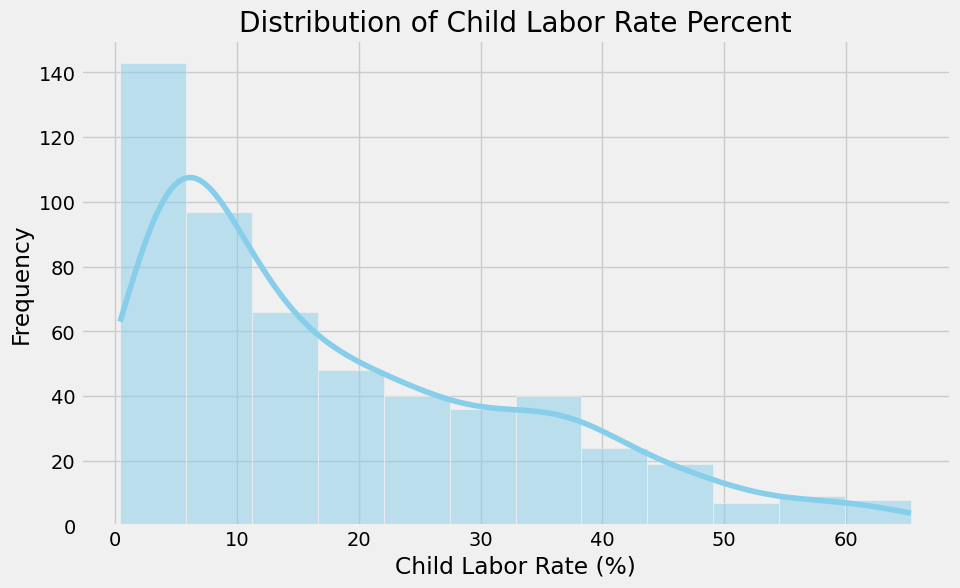

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Child_Labor_Rate_Percent'], kde=True, color='skyblue')
plt.title('Distribution of Child Labor Rate Percent')
plt.xlabel('Child Labor Rate (%)')
plt.ylabel('Frequency')
plt.show()

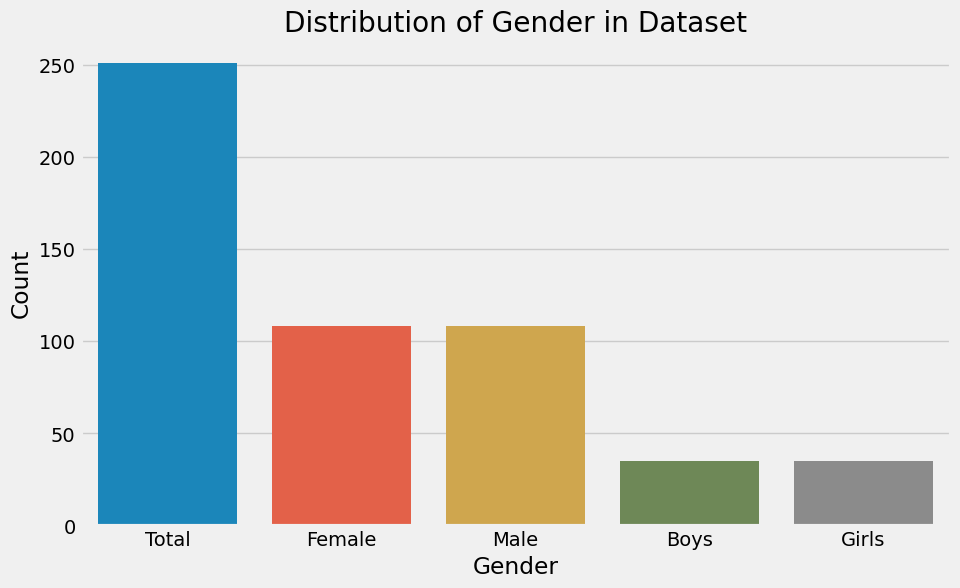

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

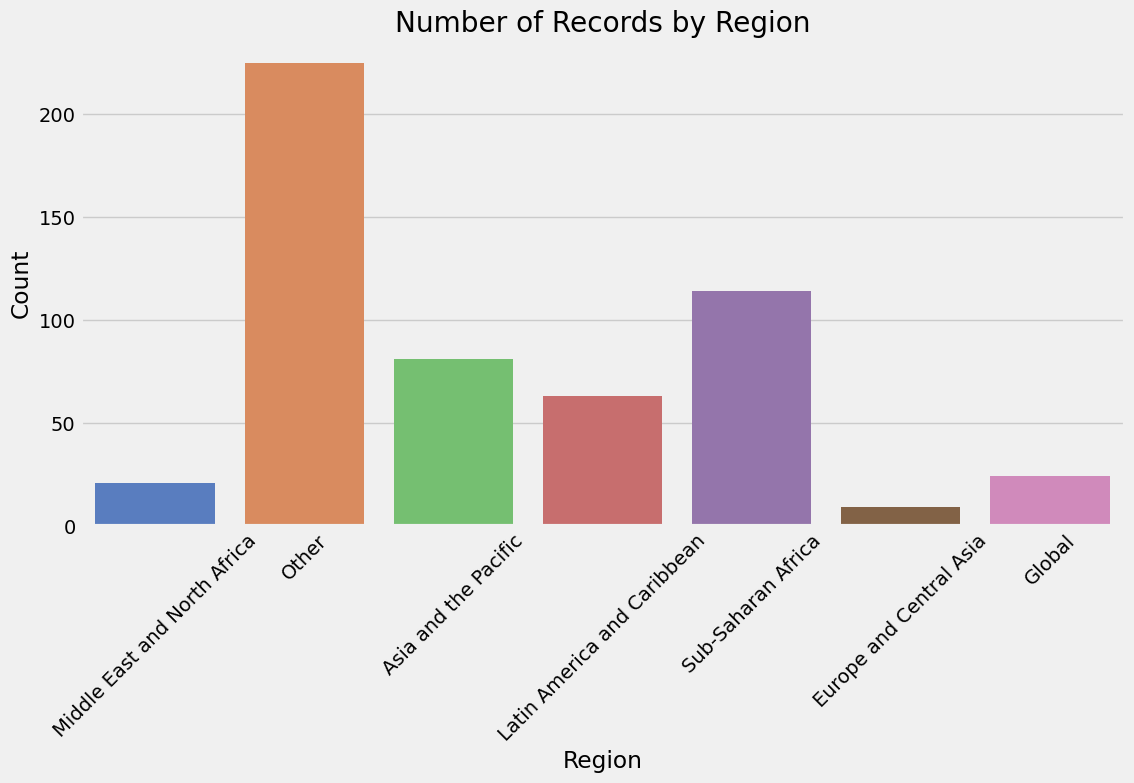

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df, palette='muted')
plt.title('Number of Records by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

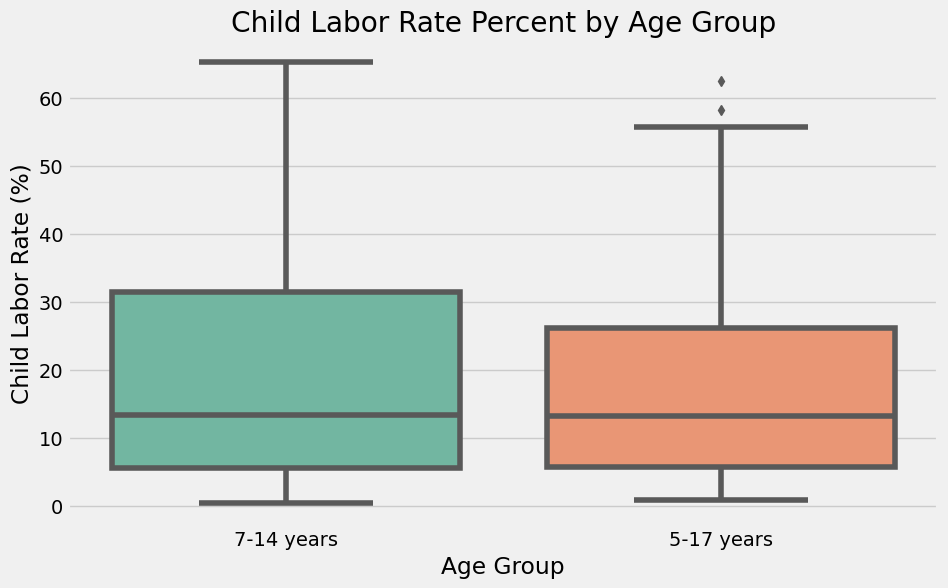

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Child_Labor_Rate_Percent', data=df, palette='Set2')
plt.title('Child Labor Rate Percent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Child Labor Rate (%)')
plt.show()

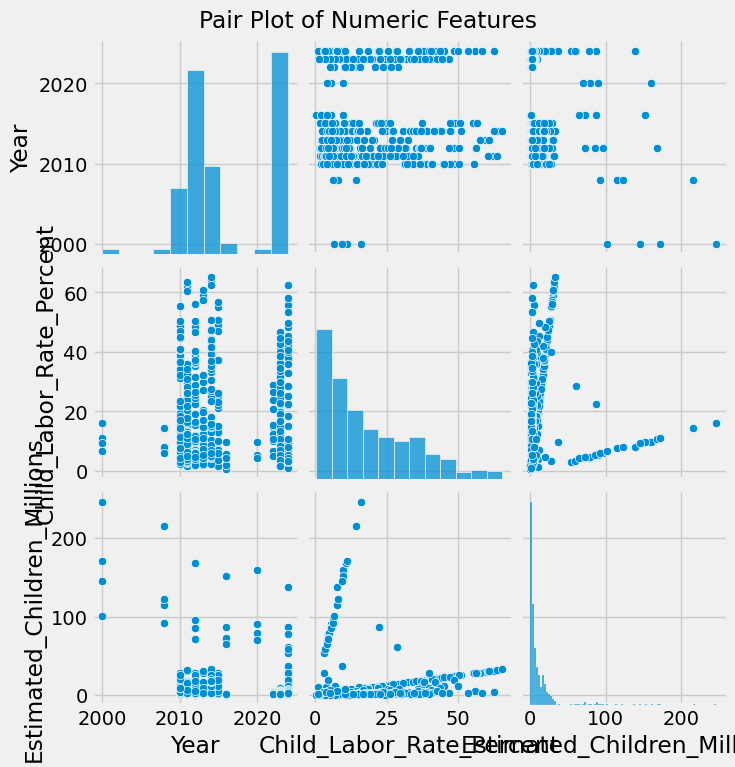

In [23]:
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()
else:
    print('Not enough numeric columns to generate a pair plot.')


In [24]:
# Create categorical target variable
df['Child_Labor_Class'] = pd.cut(
    df['Child_Labor_Rate_Percent'],
    bins=[0, 10, 20, 100],
    labels=[0, 1, 2]
)


In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['Child_Labor_Rate_Percent', 'Child_Labor_Class'], axis=1)
y = df['Child_Labor_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)


Accuracy: 0.5648148148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.47      0.55        45
           1       0.33      0.11      0.16        19
           2       0.54      0.86      0.66        44

    accuracy                           0.56       108
   macro avg       0.52      0.48      0.46       108
weighted avg       0.56      0.56      0.53       108



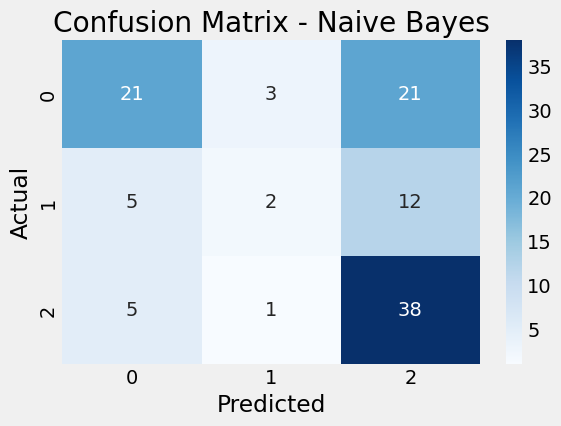

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
